In [1]:
import sys
import os
import os.path as osp
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LogNorm

sys.path.insert(0,'..')
import pyathena as pa

__LoadSim class__

In [2]:
help(pa.LoadSim)

Help on class LoadSim in module pyathena.load_sim:

class LoadSim(builtins.object)
 |  LoadSim(basedir, savdir=None, load_method='pyathena', units=<pyathena.util.units.Units object at 0x2b8b09687050>, verbose=False)
 |  
 |  Class to prepare Athena simulation data analysis. Read input parameters,
 |  find simulation output (vtk, starpar_vtk, hst, sn, zprof) files.
 |  
 |  Properties
 |  ----------
 |      basedir : str
 |          base directory of simulation output
 |      basename : str
 |          basename (tail) of basedir
 |      files : dict
 |          output file paths for vtk, starpar, hst, sn, zprof
 |      problem_id : str
 |          prefix for (vtk, starpar, hst, zprof) output
 |      par : dict
 |          input parameters and configure options read from log file
 |      ds : AthenaDataSet or yt DataSet
 |          class for reading vtk file
 |      domain : dict
 |          info about dimension, cell size, time, etc.
 |      load_method : str
 |          'pyathena' or '

In [3]:
s = pa.LoadSim('/projects/EOSTRIKE/TIGRESS-RT/R4_4pc.RT.wind/', verbose=True)

LoadSim-INFO: savdir : /projects/EOSTRIKE/TIGRESS-RT/R4_4pc.RT.wind
LoadSim-INFO: basedir: /projects/EOSTRIKE/TIGRESS-RT/R4_4pc.RT.wind
LoadSim-INFO: athinput: /projects/EOSTRIKE/TIGRESS-RT/R4_4pc.RT.wind/out.txt
LoadSim-INFO: problem_id: R4
LoadSim-INFO: hst: /projects/EOSTRIKE/TIGRESS-RT/R4_4pc.RT.wind/hst/R4.hst
LoadSim-INFO: sn: /projects/EOSTRIKE/TIGRESS-RT/R4_4pc.RT.wind/hst/R4.sn
LoadSim-INFO: vtk (joined): /projects/EOSTRIKE/TIGRESS-RT/R4_4pc.RT.wind/vtk nums: 100-260
LoadSim-INFO: starpar: /projects/EOSTRIKE/TIGRESS-RT/R4_4pc.RT.wind/starpar nums: 0-269
LoadSim-INFO: zprof: /projects/EOSTRIKE/TIGRESS-RT/R4_4pc.RT.wind/zprof nums: 0-269
LoadSim-INFO: timeit: /projects/EOSTRIKE/TIGRESS-RT/R4_4pc.RT.wind/timeit.txt


In [4]:
s.print_all_properties()

Attributes:
 ['basedir', 'basename', 'load_method', 'loglevel_def', 'logger', 'savdir', '_out_fmt_def', 'files', 'par', 'out_fmt', 'problem_id', 'nums', 'nums_id0', 'nums_starpar', 'nums_zprof', 'phase', 'domain', 'u', 'dfi']

Methods:
Decorators: Class containing a collection of decorators for prompt reading of analysis
        output, (reprocessed) hst, and zprof. Used in child classes.

        
-------------------------
_find_files: Function to find all output files under basedir and create "files" dictionary.

        hst: problem_id.hst
        sn: problem_id.sn (file format identical to hst)
        vtk: problem_id.num.vtk
        starpar_vtk: problem_id.num.starpar.vtk
        zprof: problem_id.num.phase.zprof
        timeit: timtit.txt
        
-------------------------
_get_domain_from_par: Get domain info from par['domain1']. Time is set to None.
        
-------------------------
_get_fvtk: Get vtk file path
        
-------------------------
_get_logger: Function to set lo

In [7]:
print(s.basedir, s.basename, s.problem_id, s.load_method)

/projects/EOSTRIKE/TIGRESS-RT/R4_4pc.RT.wind R4_4pc.RT.wind R4 pyathena


In [8]:
print(s.files.keys())

dict_keys(['athinput', 'hst', 'sn', 'vtk', 'vtk_id0', 'starpar', 'zprof', 'timeit'])


In [9]:
s.files['hst']

'/projects/EOSTRIKE/TIGRESS-RT/R4_4pc.RT.wind/hst/R4.hst'

In [10]:
print(s.par.keys())

dict_keys(['job', 'log', 'output1', 'output2', 'output3', 'output4', 'output5', 'output6', 'time', 'domain1', 'problem', 'feedback', 'radps', 'configure'])


In [11]:
s.par['domain1']

{'level': 0,
 'Nx1': 128,
 'x1min': -256,
 'x1max': 256,
 'bc_ix1': 4,
 'bc_ox1': 4,
 'Nx2': 128,
 'x2min': -256,
 'x2max': 256,
 'bc_ix2': 4,
 'bc_ox2': 4,
 'Nx3': 896,
 'x3min': -1792,
 'x3max': 1792,
 'bc_ix3': 2,
 'bc_ox3': 2,
 'NGrid_x1': 8,
 'NGrid_x2': 4,
 'NGrid_x3': 14,
 'AutoWithNProc': 0}

In [12]:
s.domain # le/re: left/right edge

{'Nx': array([128, 128, 896]),
 'ndim': 3,
 'le': array([ -256,  -256, -1792]),
 're': array([ 256,  256, 1792]),
 'Lx': array([ 512,  512, 3584]),
 'dx': array([4., 4., 4.]),
 'center': array([0., 0., 0.]),
 'time': None}

#### Read hst using read_hst "function"

In [13]:
hst = pa.read_hst(s.files['hst']) # pandas DataFrame
hst.columns

Index(['time', 'dt', 'mass', 'totalE', 'x1Mom', 'x2Mom', 'x3Mom', 'x1KE',
       'x2KE', 'x3KE', 'x1ME', 'x2ME', 'x3ME', 'gravPE', 'scalar0', 'scalar1',
       'scalar2', 'heat_ratio', 'heat_ratio_mid', 'heat_ratio_mid_2p', 'ftau',
       'x2dke', 'x1KE_2p', 'x2KE_2p', 'x3KE_2p', 'F3h2', 'F3h1', 'F3w', 'F3u',
       'F3c', 'F3_upper', 'F3_lower', 'F3_metal_upper', 'F3_metal_lower', 'H2',
       'H2h2', 'H2h1', 'H2w', 'H2u', 'H2c', 'P', 'P_2p', 'Pth', 'Pth_2p',
       'Pturb', 'Pturb_2p', 'nmid', 'nmid_2p', 'Vmid_2p', 'Vh2', 'Vh1', 'Vw',
       'Vu', 'Vc', 'Mh2', 'Mh1', 'Mw', 'Mu', 'Mc', 'B1', 'B2', 'B3', 'sfr10',
       'sfr40', 'sfr100', 'msp', 'mgas', 'metal_sp'],
      dtype='object')

In [14]:
hst.head()

,time,dt,mass,totalE,x1Mom,x2Mom,x3Mom,x1KE,x2KE,x3KE,...,Mc,B1,B2,B3,sfr10,sfr40,sfr100,msp,mgas,metal_sp
0,0.000000,0.003304,0.474638,418.972956,-1.353044e-08,-7.569073e-09,7.658164e-07,75.109681,120.181810,102.448053,...,0.000000e+00,0.000000e+00,5.623562,0.000000e+00,0.0,0.0,0.0,0.0,0.474638,0.0
1,0.051370,0.000806,0.474643,415.930148,1.597625e-04,-2.372628e-03,3.928090e-04,75.623814,121.102186,102.931599,...,2.002475e-07,-3.008521e-07,5.623344,-7.217689e-18,0.0,0.0,0.0,0.0,0.474643,0.0
2,0.101354,0.001509,0.474649,416.552211,3.091640e-04,-3.740975e-03,1.015153e-03,74.611229,120.708711,102.036650,...,1.773914e-06,-1.477073e-06,5.623065,-1.995706e-17,0.0,0.0,0.0,0.0,0.474649,0.0
3,0.150056,0.000633,0.474654,419.602004,7.794302e-04,-3.227191e-03,1.259299e-03,73.645912,120.477589,101.069690,...,4.049933e-06,-3.636566e-06,5.622758,-2.193186e-17,0.0,0.0,0.0,0.0,0.474654,0.0
4,0.200651,0.000726,0.474662,423.097148,8.387588e-04,-2.924587e-03,4.807972e-04,73.185334,120.985921,100.781416,...,3.890360e-06,-7.309978e-06,5.622392,5.492258e-17,0.0,0.0,0.0,0.0,0.474662,0.0


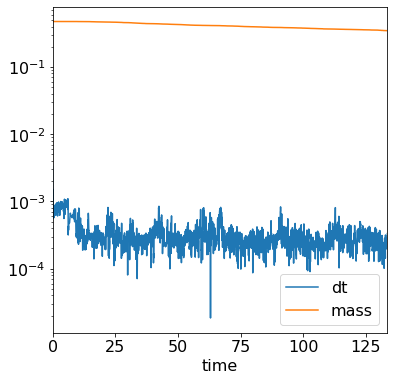

In [15]:
ax = hst.plot('time',y=['dt','mass']) # dt_mhd and gas mass in code units
ax.set_yscale('log')

In [20]:
print(s.nums) # vtk file numbers in the directory

[100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260]


__One can laod vtk file using ``ds = pa.read_vtk(s.files['vtk_id0'][num])``, but more conveniently__

In [22]:
num = s.nums[2]
ds = s.load_vtk(num=num)

LoadSim-INFO: [load_vtk]: Vtk file does not exist. Try joined vtk
LoadSim-INFO: [load_vtk]: R4.0120.vtk. Time: 60.000220


In [23]:
help(ds)

Help on AthenaDataSet in module pyathena.io.read_vtk object:

class AthenaDataSet(builtins.object)
 |  AthenaDataSet(filename, id0_only=False, units=<pyathena.util.units.Units object at 0x2b8b0939a5d0>, dfi=None)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, filename, id0_only=False, units=<pyathena.util.units.Units object at 0x2b8b0939a5d0>, dfi=None)
 |      Class to read athena vtk file.
 |      
 |      Parameters
 |      ----------
 |      filename : string
 |          Name of the file to open, including extension
 |      id0_only : bool
 |          Flag to enforce to read vtk file in id0 directory only.
 |          Default value is False.
 |      units : Units
 |          pyathena Units object (used for reading derived fields)
 |      dfi : dict
 |          Dictionary containing derived fields info
 |  
 |  get_cc_pos(self)
 |      Compute cell center positions
 |      
 |      Returns
 |      -------
 |      xc : numpy array
 |          Unique cell-centered cooridnates


In [27]:
ds.domain

{'all_grid_equal': True,
 'ngrid': 1,
 'le': array([ -256.,  -256., -1792.], dtype=float32),
 're': array([ 256.,  256., 1792.], dtype=float32),
 'dx': array([4., 4., 4.], dtype=float32),
 'Lx': array([ 512.,  512., 3584.], dtype=float32),
 'center': array([0., 0., 0.], dtype=float32),
 'Nx': array([128, 128, 896]),
 'ndim': 3,
 'time': 60.00022}

__get_field(): read 3d fields__

In [25]:
help(ds.get_field) # Setting (le, re) manually does not work perfectly

Help on method get_field in module pyathena.io.read_vtk:

get_field(field='density', le=None, re=None, as_xarray=True) method of pyathena.io.read_vtk.AthenaDataSet instance
    Read 3d fields data.
    
    Parameters
    ----------
    field : (list of) string
        The name of the field(s) to be read.
    le : sequence of floats
       Left edge. Default value is the domain left edge.
    re : sequence of floats
       Right edge. Default value is the domain right edge.
    as_xarray : bool
       If True, returns results as an xarray Dataset. If False, returns a
       dictionary containing numpy arrays. Default value is True.
    
    Returns
    -------
    dat : xarray dataset
        An xarray dataset containing fields.



In [28]:
ds.dirname, ds.ext

('/projects/EOSTRIKE/TIGRESS-RT/R4_4pc.RT.wind/vtk', 'vtk')

In [29]:
# field names extracted from the raw vtk file
# velocity, magnetic_fields are vectors
ds.field_list

['density',
 'velocity',
 'pressure',
 'cell_centered_B',
 'gravitational_potential',
 'temperature',
 'heat_rate',
 'cool_rate',
 'heat_ratio',
 'CR_ionization_rate',
 'rad_energy_density_PE',
 'rad_energy_density_PE_unatt',
 'rad_flux_PE',
 'specific_scalar[0]',
 'xH2',
 'xe']

In [30]:
ds.derived_field_list

['rho',
 'nH',
 'pok',
 'r',
 'vmag',
 'vr',
 'vx',
 'vy',
 'vz',
 'pr',
 'pr_abs',
 'T',
 'cool_rate',
 'heat_rate',
 'net_cool_rate',
 'Bx',
 'By',
 'Bz',
 'Bmag',
 'nH2',
 '2nH2',
 'xH2',
 '2xH2',
 'nHI',
 'xHI',
 'nHII',
 'xHII',
 'nHn',
 'xn',
 'ne',
 'nesq',
 'xe',
 'xCI',
 'nCI',
 'xCII',
 'xi_CR',
 'T_alt',
 'chi_PE',
 'chi_FUV',
 'Erad_LyC',
 'Erad_FUV',
 'heat_ratio',
 'NHeff',
 'j_X']

__With ``xarray=True`` option (default is True), read dataset as a xarray DataSet__

__See http://xarray.pydata.org/en/stable/quick-overview.html for a quick demonstration__

In [32]:
d = ds.get_field(['density','temperature','velocity'])

In [33]:
d.keys()

KeysView(<xarray.Dataset>
Dimensions:      (x: 128, y: 128, z: 896)
Coordinates:
  * x            (x) float64 -254.0 -250.0 -246.0 -242.0 ... 246.0 250.0 254.0
  * y            (y) float64 -254.0 -250.0 -246.0 -242.0 ... 246.0 250.0 254.0
  * z            (z) float64 -1.79e+03 -1.786e+03 ... 1.786e+03 1.79e+03
Data variables:
    density      (z, y, x) float32 0.0019167009 0.0017609893 ... 0.0004943731
    temperature  (z, y, x) float32 1781035.6 1940183.0 ... 892028.25 907973.1
    velocity1    (z, y, x) float32 -11.415868 -11.712305 ... -13.001524
    velocity2    (z, y, x) float32 79.271736 75.30563 ... -5.8680863 4.22631
    velocity3    (z, y, x) float32 -196.35211 -188.46904 ... 67.56234 49.41917
Attributes:
    domain:   {'all_grid_equal': True, 'ngrid': 1, 'le': array([ -256.,  -256...)

__Indexing follows the convention of the Athena code: for scalar fields, the innermost (fastest running) index is the x-direction, while the outermost index is the z-direction__

In [37]:
type(d['density']), d['density'].shape, d['velocity1'].shape

(xarray.core.dataarray.DataArray, (896, 128, 128), (896, 128, 128))

In [39]:
d = ds.get_field(['density','T','nH','rho','vz'])
d

<xarray.Dataset>
Dimensions:  (x: 128, y: 128, z: 896)
Coordinates:
  * x        (x) float64 -254.0 -250.0 -246.0 -242.0 ... 242.0 246.0 250.0 254.0
  * y        (y) float64 -254.0 -250.0 -246.0 -242.0 ... 242.0 246.0 250.0 254.0
  * z        (z) float64 -1.79e+03 -1.786e+03 -1.782e+03 ... 1.786e+03 1.79e+03
Data variables:
    density  (z, y, x) float32 0.0019167009 0.0017609893 ... 0.0004943731
    vz       (z, y, x) float32 -196.35211 -188.46904 ... 67.56234 49.41917
    nH       (z, y, x) float32 0.0019167009 0.0017609893 ... 0.0004943731
    rho      (z, y, x) float32 4.578449e-27 4.2064987e-27 ... 1.1809156e-27
    T        (z, y, x) float32 1781035.6 1940183.0 ... 892028.25 907973.1
Attributes:
    domain:   {'all_grid_equal': True, 'ngrid': 1, 'le': array([ -256.,  -256...
    dfi:      {'rho': {'field_dep': ['density'], 'func': <function set_derive...

__Plot slice of density and temperature at z=0__

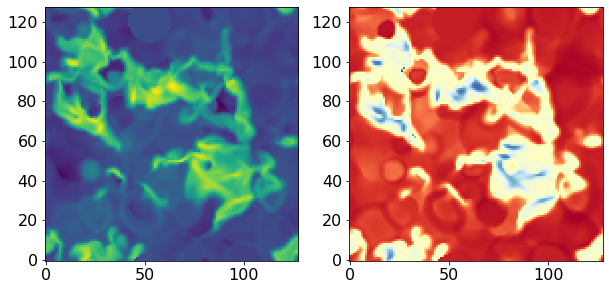

In [40]:
iz = ds.domain['Nx'][2] // 2
fig, axes = plt.subplots(1, 2, figsize=(10,5))
cmap_temp = pa.cmap_shift(mpl.cm.RdYlBu_r, midpoint=3.0/7.0)
axes[0].imshow(d['nH'][iz,:,:], norm=LogNorm(), origin='lower')
axes[1].imshow(d['T'][iz,:,:], norm=LogNorm(), origin='lower', 
               cmap=cmap_temp)

In [26]:
dat = ds.get_field(['density', 'temperature'], as_xarray=True)

In [41]:
dat

<xarray.Dataset>
Dimensions:      (x: 128, y: 128, z: 896)
Coordinates:
  * x            (x) float64 -254.0 -250.0 -246.0 -242.0 ... 246.0 250.0 254.0
  * y            (y) float64 -254.0 -250.0 -246.0 -242.0 ... 246.0 250.0 254.0
  * z            (z) float64 -1.79e+03 -1.786e+03 ... 1.786e+03 1.79e+03
Data variables:
    density      (z, y, x) float32 0.0019167009 0.0017609893 ... 0.0004943731
    temperature  (z, y, x) float32 1781035.6 1940183.0 ... 892028.25 907973.1
    velocity1    (z, y, x) float32 -11.415868 -11.712305 ... -13.001524
    velocity2    (z, y, x) float32 79.271736 75.30563 ... -5.8680863 4.22631
    velocity3    (z, y, x) float32 -196.35211 -188.46904 ... 67.56234 49.41917
Attributes:
    domain:   {'all_grid_equal': True, 'ngrid': 1, 'le': array([ -256.,  -256...

In [42]:
dat.x

<xarray.DataArray 'x' (x: 128)>
array([-254., -250., -246., -242., -238., -234., -230., -226., -222., -218.,
       -214., -210., -206., -202., -198., -194., -190., -186., -182., -178.,
       -174., -170., -166., -162., -158., -154., -150., -146., -142., -138.,
       -134., -130., -126., -122., -118., -114., -110., -106., -102.,  -98.,
        -94.,  -90.,  -86.,  -82.,  -78.,  -74.,  -70.,  -66.,  -62.,  -58.,
        -54.,  -50.,  -46.,  -42.,  -38.,  -34.,  -30.,  -26.,  -22.,  -18.,
        -14.,  -10.,   -6.,   -2.,    2.,    6.,   10.,   14.,   18.,   22.,
         26.,   30.,   34.,   38.,   42.,   46.,   50.,   54.,   58.,   62.,
         66.,   70.,   74.,   78.,   82.,   86.,   90.,   94.,   98.,  102.,
        106.,  110.,  114.,  118.,  122.,  126.,  130.,  134.,  138.,  142.,
        146.,  150.,  154.,  158.,  162.,  166.,  170.,  174.,  178.,  182.,
        186.,  190.,  194.,  198.,  202.,  206.,  210.,  214.,  218.,  222.,
        226.,  230.,  234.,  238.,  242.,  246.,  250.,  254.])
Coordinates:
  * x        (x) float64 -254.0 -250.0 -246.0 -242.0 ... 242.0 246.0 250.0 254.0

__get_slice() method__

In [43]:
help(ds.get_slice)

Help on method get_slice in module pyathena.io.read_vtk:

get_slice(axis, field='density', pos='c', method='nearest') method of pyathena.io.read_vtk.AthenaDataSet instance
    Read slice of fields.
    
    Parameters
    ----------
    axis : str
        Axis to slice along. 'x' or 'y' or 'z'
    field : (list of) str
        The name of the field(s) to be read.
    pos : float or str
        Slice through If 'c' or 'center', get a slice through the domain
        center. Default value is 'c'.
    method : str
        
    
    Returns
    -------
    slc : xarray dataset
        An xarray dataset containing slices.



In [44]:
slc = ds.get_slice('z', ['density', 'temperature', 'pressure'])

In [45]:
slc

<xarray.Dataset>
Dimensions:      (x: 128, y: 128)
Coordinates:
  * x            (x) float64 -254.0 -250.0 -246.0 -242.0 ... 246.0 250.0 254.0
  * y            (y) float64 -254.0 -250.0 -246.0 -242.0 ... 246.0 250.0 254.0
    z            float64 2.0
Data variables:
    density      (y, x) float32 0.0116577735 0.011994397 ... 0.015544935
    temperature  (y, x) float32 7407868.0 5197572.5 ... 1797566.0 7481376.0
    pressure     (y, x) float32 1164.8171 840.8681 ... 1606.5594 1568.6256
Attributes:
    domain:   {'all_grid_equal': True, 'ngrid': 1, 'le': array([ -256.,  -256...

In [46]:
slc.domain

{'all_grid_equal': True,
 'ngrid': 1,
 'le': array([ -256.,  -256., -1792.], dtype=float32),
 're': array([ 256.,  256., 1792.], dtype=float32),
 'dx': array([4., 4., 4.], dtype=float32),
 'Lx': array([ 512.,  512., 3584.], dtype=float32),
 'center': array([0., 0., 0.], dtype=float32),
 'Nx': array([128, 128, 896]),
 'ndim': 3,
 'time': 60.00022}

In [47]:
type(slc), type(slc.density), type(slc.density.data)

(xarray.core.dataset.Dataset, xarray.core.dataarray.DataArray, numpy.ndarray)

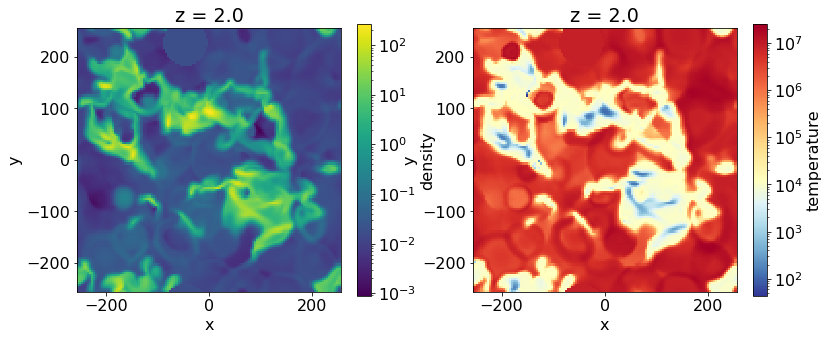

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
im1 = slc['density'].plot(ax=axes[0], norm=LogNorm())
im2 = slc['temperature'].plot(ax=axes[1], norm=LogNorm(), cmap=cmap_temp)
for im in (im1, im2):
    im.axes.set_aspect('equal')

## 2d histogram

Text(0, 0.5, '$\\log_{10}\\,T$')

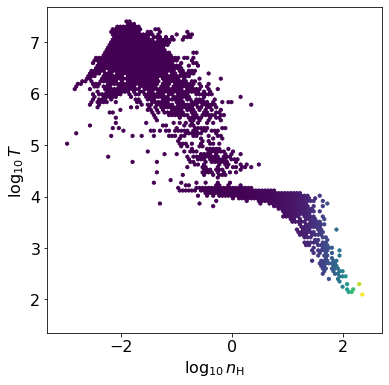

In [49]:
nH = slc['density'].data.flatten()
lognH = np.log10(nH)
logT = np.log10(slc['temperature'].data.flatten())
plt.hexbin(lognH, logT, nH, mincnt=1)
plt.xlabel(r'$\log_{10}\,n_{\rm H}$')
plt.ylabel(r'$\log_{10}\,T$')